# COVID-19 Data Visualization and Dashboards

This project analyzes global COVID-19 data using the [COVID-19 Global Dataset](https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset).  
The goal is to clean and organize the data, create visualizations, and build dashboards to explore the worldwide impact of COVID-19.

---

### **Objectives**
1. Clean and prepare the dataset for analysis.
2. Create visualizations to show trends, comparisons, and patterns.
3. Build three dashboards that tell a story individually and as a whole.
4. Write the data story for each dashboard and a combined story tying them together.


## 1. Data Cleaning & Preparation

Steps:
- Load the daily and summary datasets.
- Convert the `date` column to datetime format.
- Select the top 5 countries with the highest total confirmed cases.
- Aggregate daily new cases by week for trend visualization.


In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSV files
daily_df = pd.read_csv("worldometer_coronavirus_daily_data.csv")
summary_df = pd.read_csv("worldometer_coronavirus_summary_data.csv")

# Clean and prepare data
daily_df['date'] = pd.to_datetime(daily_df['date'], errors='coerce')
top5_countries = summary_df.sort_values('total_confirmed', ascending=False).head(5)['country'].tolist()

top5_daily = daily_df[daily_df['country'].isin(top5_countries)]
top5_daily['week'] = top5_daily['date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_cases = top5_daily.groupby(['week', 'country'])['daily_new_cases'].sum().reset_index()

continent_summary = summary_df.groupby('continent').agg(
    total_cases=('total_confirmed','sum'),
    total_deaths=('total_deaths','sum')
).reset_index()

scatter_data = summary_df[['country','population','total_cases_per_1m_population']].dropna()


/tmp/ipython-input-1-1796262593.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_daily['week'] = top5_daily['date'].dt.to_period('W').apply(lambda r: r.start_time)


## 2. Visualizations

We create four visualizations:
1. Line chart – Weekly new cases for the top 5 countries.
2. Grouped bar chart – Total cases and deaths by continent.
3. Scatter plot – Population vs cases per 1M population.
4. Pie chart – Share of total COVID-19 deaths by continent.


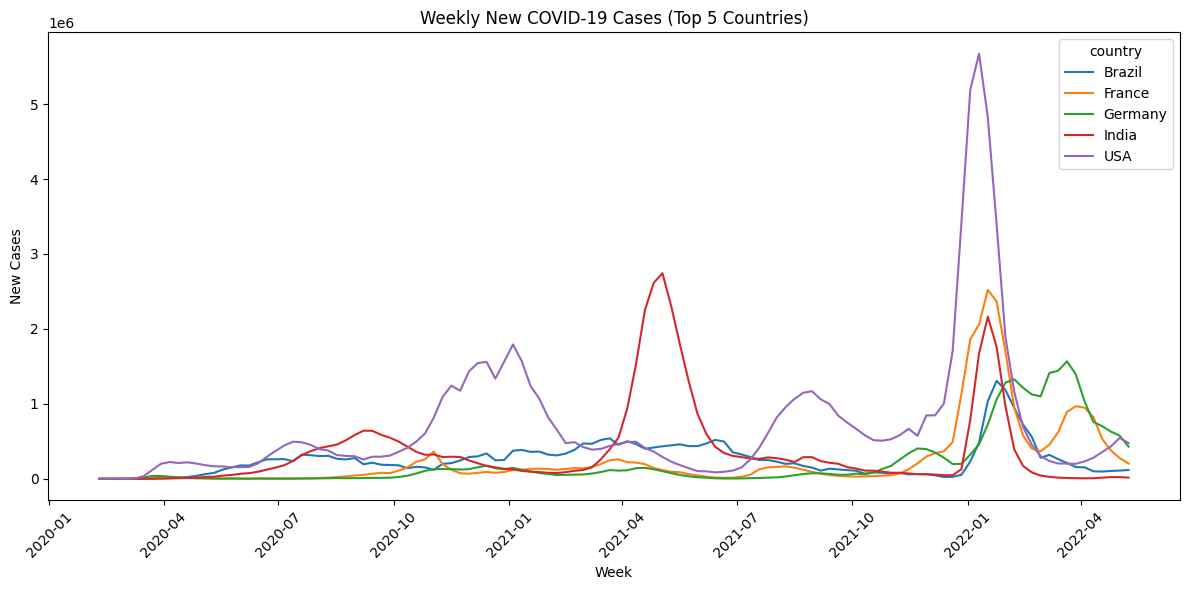

In [ ]:
# Line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_cases, x='week', y='daily_new_cases', hue='country')
plt.title('Weekly New COVID-19 Cases (Top 5 Countries)')
plt.xlabel('Week')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

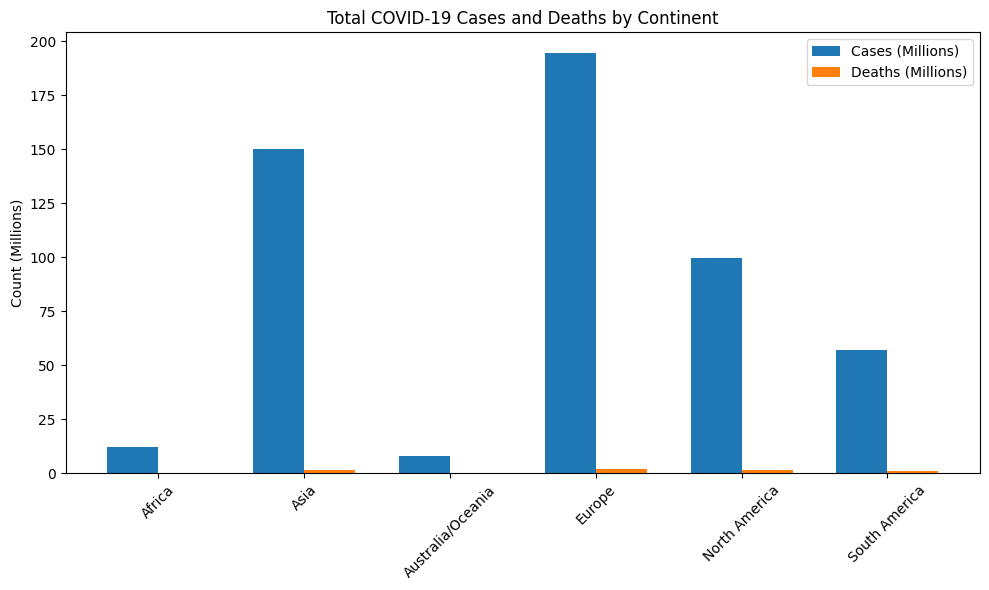

In [ ]:
# Grouped bar chart
plt.figure(figsize=(10,6))
x = np.arange(len(continent_summary['continent']))
width = 0.35
plt.bar(x - width/2, continent_summary['total_cases']/1e6, width, label='Cases (Millions)')
plt.bar(x + width/2, continent_summary['total_deaths']/1e6, width, label='Deaths (Millions)')
plt.xticks(x, continent_summary['continent'], rotation=45)
plt.ylabel('Count (Millions)')
plt.title('Total COVID-19 Cases and Deaths by Continent')
plt.legend()
plt.tight_layout()
plt.show()

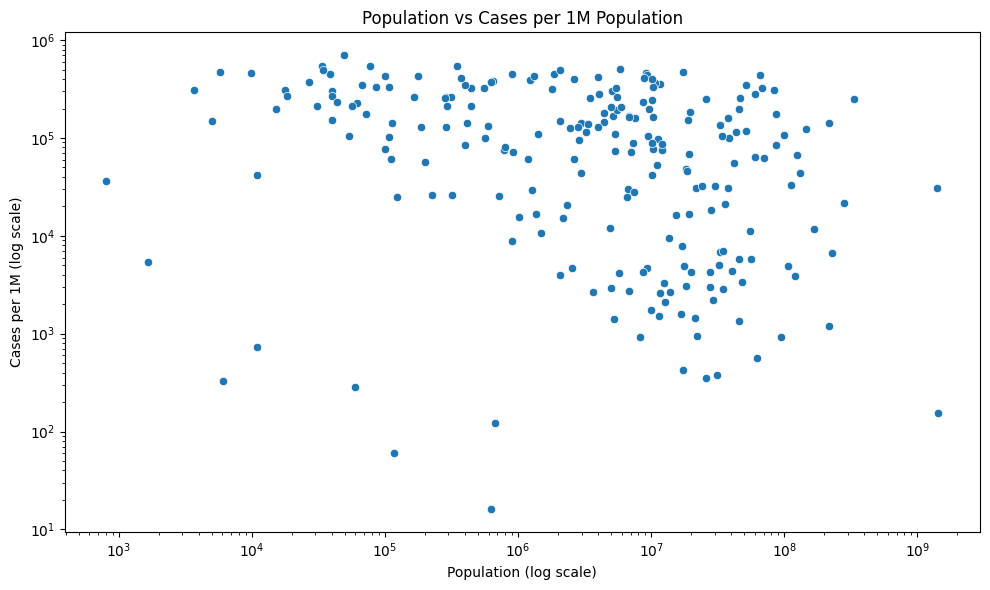

In [ ]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=scatter_data, x='population', y='total_cases_per_1m_population')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Population (log scale)')
plt.ylabel('Cases per 1M (log scale)')
plt.title('Population vs Cases per 1M Population')
plt.tight_layout()
plt.show()

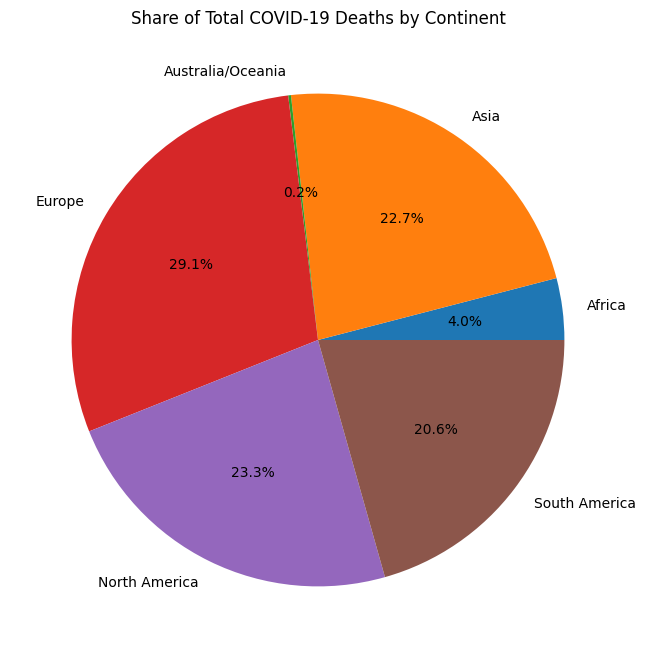

In [ ]:
# Pie chart
plt.figure(figsize=(8,8))
plt.pie(continent_summary['total_deaths'], labels=continent_summary['continent'], autopct='%1.1f%%')
plt.title('Share of Total COVID-19 Deaths by Continent')
plt.show()

## 3. Dashboards (Plotly)

We combine the charts into three dashboards:

- **Dashboard 1:** Line chart + Bar chart (global trends)
- **Dashboard 2:** Scatter plot (population vs infection rate)
- **Dashboard 3:** Pie chart (share of deaths)


In [ ]:
# Dashboard 1
fig1 = make_subplots(rows=2, cols=1, subplot_titles=("Weekly New Cases (Top 5 Countries)", "Total Cases and Deaths by Continent"))

for c in top5_countries:
    temp = weekly_cases[weekly_cases['country'] == c]
    fig1.add_trace(go.Scatter(x=temp['week'], y=temp['daily_new_cases'], mode='lines', name=c), row=1, col=1)

fig1.add_trace(go.Bar(x=continent_summary['continent'], y=continent_summary['total_cases']/1e6, name="Cases (M)"), row=2, col=1)
fig1.add_trace(go.Bar(x=continent_summary['continent'], y=continent_summary['total_deaths']/1e6, name="Deaths (M)"), row=2, col=1)

fig1.update_layout(height=800, title_text="Dashboard 1: Global COVID-19 Trends", barmode='group')
fig1.show()

In [ ]:
# Dashboard 2
fig2 = px.scatter(
    scatter_data,
    x="population", y="total_cases_per_1m_population",
    log_x=True, log_y=True,
    title="Dashboard 2: Population vs. Cases per 1M",
    labels={"population":"Population (log scale)", "total_cases_per_1m_population":"Cases per 1M (log scale)"}
)
fig2.show()

In [ ]:
# Dashboard 3
fig3 = px.pie(
    continent_summary,
    values='total_deaths', names='continent',
    title="Dashboard 3: Share of Total COVID-19 Deaths by Continent"
)
fig3.show()

## 4. Dashboard Data Stories

### Dashboard 1 – Global COVID-19 Trends
This dashboard highlights how COVID-19 affected different countries and continents over time. The line chart shows weekly new cases for the top five countries, while the bar chart compares total cases and deaths by continent.

### Dashboard 2 – Population vs Infection Rate
This dashboard focuses on how population size relates to infection rates. It shows that some smaller countries had disproportionately high cases per million people, while larger countries had lower infection rates relative to their population.

### Dashboard 3 – Share of COVID-19 Deaths by Continent
This dashboard breaks down the share of total COVID-19 deaths by continent. The pie chart shows that most global deaths occurred in just a few continents.

---

## 5. Combined Data Story
Together, the dashboards provide a full story of COVID-19's global impact:

- Dashboard 1 shows that COVID-19 case spikes varied by country and that certain continents had much higher total cases and deaths.
- Dashboard 2 reveals that population size did not always predict infection rates—some small countries had very high cases per capita.
- Dashboard 3 highlights that global deaths were concentrated in specific continents, despite differences in population size and infection rates.

Overall, the dashboards show that COVID-19 had an uneven global impact, both in how cases spread over time and in which regions carried the highest burden of deaths.
